In [2]:
addpath(genpath(cd))

The file was loaded successfully. Elapsed time : 0.134 s.

ans =

    'uint16'


ans =

   256   256   128




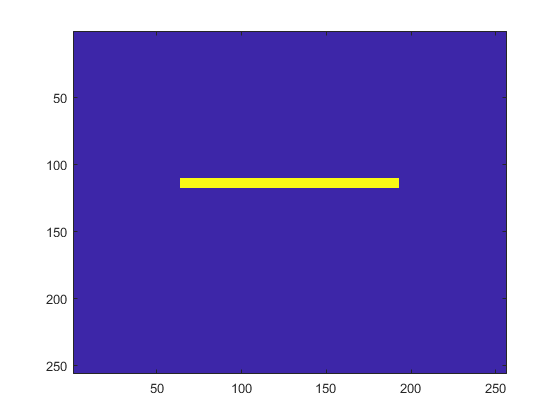

In [11]:
bars=loadtiff('Bars-Stack.tif');
class(bars)
size(bars)
imagesc(bars(:,:,60))

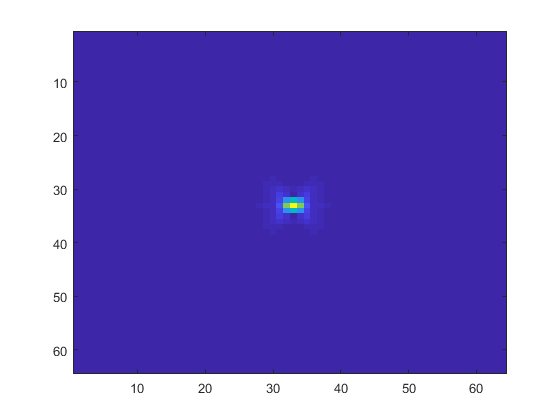

In [24]:
% define parameters for PSF with RI mismatch generated at depth=10000 nm
lambdaEx=600;
lambdaEm=660;
numAper=1.3; 
magObj=100; 
rindexObj=1.51;
ccdSize=13000; 
dz=300; 
xysize=64; 
nslices=64; 
rindexSample=1.4; 
depth=0;

% generate PSF 
psf = wfmpsf(lambdaEx, lambdaEm, numAper, magObj, rindexObj, ...
        ccdSize, dz, xysize, nslices, rindexSample, depth);
        
imagesp(psf)

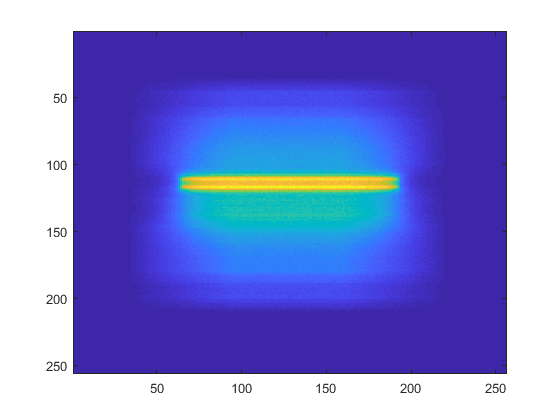

In [25]:
% convolve bars image with PSF
otf=single(psf2otf(psf, size(bars)));
barsfft=fftn(bars, size(bars));
temp=otf.*barsfft;
img=ifftn( temp );

% add noise to image
noisy=single(imnoise(uint16(img), 'poisson'));noisy=single(imnoise(uint16(img), 'poisson'));

imagesc(noisy(:,:,60))

In [29]:
% perform fixed PSF deconvolution (50 iterations)
fixeddecon100=deconvlucy(noisy, psf, 100);

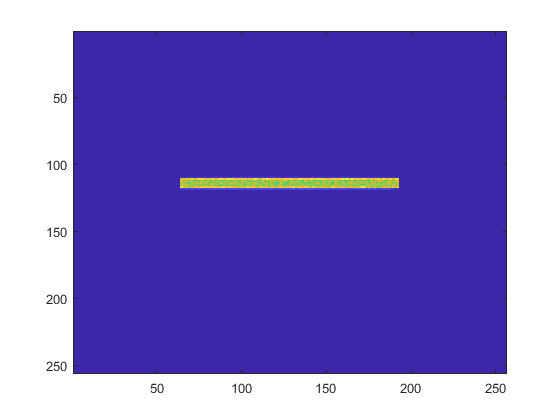

In [30]:
imagesc(fixeddecon100(:,:,60))

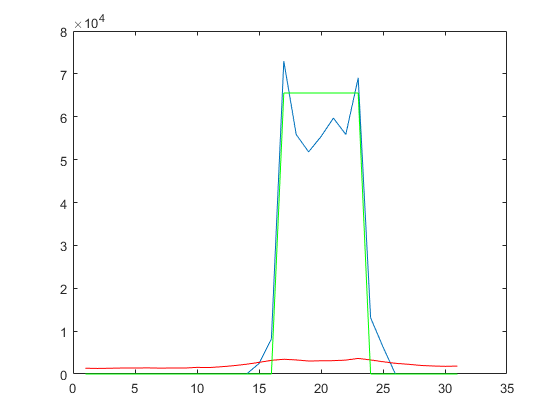

In [31]:
plot(fixeddecon100(95:125,128,60))
hold on
plot(noisy(95:125,128,60), 'r')
plot(bars(95:125,128,60), 'g')